# Project 3 - 01 : Data cleaning / EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, json
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# seaborn
sns.set()
sns.set_style("dark")
plt.style.use('fivethirtyeight')

# pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.options.display.max_colwidth = 500

# plotly
plotly_base_params = {
    'template': "plotly_white",
    'title_font': dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    'font': dict(color='#424242'), 
    'hoverlabel': dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")
}

/content/drive/MyDrive/Colab Notebooks/OC_IML/OC_IML_P3_EnergyConsumption


## Loading Data

In [ ]:
# Data 2015 Import
data2015 = pd.read_csv('Pelec_04_data/2015-building-energy-benchmarking.csv', sep=',')
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [ ]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.000,88434,0,88434,Hotel,Hotel,88434.000,NaN,nan,NaN,nan,NaN,65.000,78.900,80.300,173.500,175.100,6981428.000,7097539.000,2023032.000,1080307.000,3686160.000,12724.000,1272388.000,0.000,249.430,2.640,No,NaN,Compliant,NaN,nan,14.000,nan,31.000,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.000,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000,Parking,15064.000,Restaurant,4622.000,NaN,51.000,94.400,99.000,191.300,195.200,8354235.000,8765788.000,0.000,1144563.000,3905411.000,44490.000,4448985.000,0.000,263.510,2.380,No,NaN,Compliant,NaN,nan,14.000,nan,31.000,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.000,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.000,Parking,100000.000,Swimming Pool,0.000,NaN,18.000,96.600,99.700,242.700,246.500,73130656.000,75506272.000,19660404.000,14583930.000,49762435.000,37099.000,3709900.000,0.000,2061.480,1.920,Yes,NaN,Compliant,NaN,nan,56.000,nan,31.000,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.000,61320,0,61320,Hotel,Hotel,61320.000,NaN,nan,NaN,nan,NaN,1.000,460.400,462.500,636.300,643.200,28229320.000,28363444.000,23458518.000,811521.000,2769023.000,20019.000,2001894.000,0.000,1936.340,31.380,No,NaN,Compliant,High Outlier,nan,56.000,nan,31.000,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.000,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.000,Parking,68009.000,Swimming Pool,0.000,NaN,67.000,120.100,122.100,228.800,227.100,14829099.000,15078243.000,0.000,1777841.000,6066245.000,87631.000,8763105.000,0.000,507.700,4.020,No,NaN,Compliant,NaN,nan,56.000,nan,31.000,19576


In [ ]:
# Data 2016 Import
data2016 = pd.read_csv('Pelec_04_data/2016-building-energy-benchmarking.csv', sep=',')
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [ ]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.000,0659000030,7,DOWNTOWN,47.612,-122.338,1927,1.000,12,88434,0,88434,Hotel,Hotel,88434.000,NaN,nan,NaN,nan,NaN,60.000,81.700,84.300,182.500,189.000,7226362.500,7456910.000,2003882.000,1156514.250,3946027.000,12764.529,1276453.000,False,nan,Compliant,NaN,249.980,2.830
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.000,0659000220,7,DOWNTOWN,47.613,-122.334,1996,1.000,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000,Parking,15064.000,Restaurant,4622.000,NaN,61.000,94.800,97.900,176.100,179.400,8387933.000,8664479.000,0.000,950425.188,3242851.000,51450.816,5145082.000,False,nan,Compliant,NaN,295.860,2.860
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.000,0659000475,7,DOWNTOWN,47.614,-122.338,1969,1.000,41,956110,196718,759392,Hotel,Hotel,756493.000,NaN,nan,NaN,nan,NaN,43.000,96.000,97.700,241.900,244.100,72587024.000,73937112.000,21566554.000,14515435.000,49526664.000,14938.000,1493800.000,False,nan,Compliant,NaN,2089.280,2.190
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.000,0659000640,7,DOWNTOWN,47.614,-122.337,1926,1.000,10,61320,0,61320,Hotel,Hotel,61320.000,NaN,nan,NaN,nan,NaN,56.000,110.800,113.300,216.200,224.000,6794584.000,6946800.500,2214446.250,811525.312,2768924.000,18112.131,1811213.000,False,nan,Compliant,NaN,286.430,4.670
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.000,0659000970,7,DOWNTOWN,47.614,-122.340,1980,1.000,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.000,Parking,68009.000,Swimming Pool,0.000,NaN,75.000,114.800,118.700,211.400,215.600,14172606.000,14656503.000,0.000,1573448.625,5368607.000,88039.984,8803998.000,False,nan,Compliant,NaN,505.010,2.880


**Load columns metadata**  
For a better understanding of the different columns and a comparison of the 2 datasets

In [ ]:
#@title 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def display_metadata2015(column):
    with open("Pelec_04_data/socrata_metadata_2015-building-energy-benchmarking.json", "r") as read_file:
        metadata = json.load(read_file)
    # drop root metadata
    metadata = metadata['columns']
    # parse to dataframe
    metadata = pd.json_normalize(metadata)
    print(f"\n{column}: {metadata['description'][metadata['name']==column].values[0]}")
print("2015 metadata:")
interact(display_metadata2015, column=data2015.columns);

2015 metadata:


interactive(children=(Dropdown(description='column', options=('OSEBuildingID', 'DataYear', 'BuildingType', 'Pr…

In [ ]:
#@title

def display_metadata2016(column):
    with open("Pelec_04_data/socrata_metadata_2016-building-energy-benchmarking.json", "r") as read_file:
        metadata = json.load(read_file)
    # drop root metadata
    metadata = metadata['columns']
    # parse to dataframe
    metadata = pd.json_normalize(metadata)
    print(f"\n{column}: {metadata['description'][metadata['name']==column].values[0]}")
print("2016 metadata:")
interact(display_metadata2016, column=data2016.columns);

2016 metadata:


interactive(children=(Dropdown(description='column', options=('OSEBuildingID', 'DataYear', 'BuildingType', 'Pr…

## Cleaning Data

### Unify / clean columns

**Difference between columns**

In [ ]:
list(list(set(data2015.columns)-set(data2016.columns)) + list(set(data2016.columns)-set(data2015.columns)))

['Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts',
 'Location',
 'GHGEmissions(MetricTonsCO2e)',
 'OtherFuelUse(kBtu)',
 'Zip Codes',
 '2010 Census Tracts',
 'Comment',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'ZipCode',
 'Latitude',
 'State',
 'Address',
 'TotalGHGEmissions',
 'Longitude']

**Renaming columns to assemble those that are clearly the same**

In [ ]:
data2015.rename(columns={'Zip Codes':'zipcode',
                         'Comment':'comment',
                         'GHGEmissions(MetricTonsCO2e)':'GHG_emissions_TCO2e',
                         'GHGEmissionsIntensity(kgCO2e/ft2)':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

In [ ]:
data2016.rename(columns={'Address':'address',
                         'City':'city',
                         'State':'state',
                         'ZipCode':'zipcode',
                         'Latitude':'latitude',
                         'Longitude':'longitude',
                         'Comments':'comment',
                         'TotalGHGEmissions':'GHG_emissions_TCO2e', 
                         'GHGEmissionsIntensity':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

**Parsing json in 'Location' column for data2015**

In [ ]:
# display json struct
print(data2015['Location'][0])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


In [ ]:
# correctly format json 
data2015['Location'] = (data2015
                        .Location
                        .astype(str)
                        .apply(lambda x: x.replace("'", "\""))
                        .apply(lambda x: x.replace("\"{", "{"))
                        .apply(lambda x: x.replace("}\"", "}")))
data2015.replace('nan', np.nan, inplace=True)
print(data2015['Location'][0])

{"latitude": "47.61219025", "longitude": "-122.33799744", "human_address": {"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}}


In [ ]:
# parse json column into new df
rows = []
for i in range(data2015['Location'].shape[0]):
    if type(data2015['Location'][i]) == str :
        row_df = pd.json_normalize(json.loads(data2015['Location'][i]))    
        rows.append(row_df.values[0])
    else:
        rows.append([np.nan,np.nan,np.nan,np.nan,np.nan])
        
len(rows)

3340

In [ ]:
# add new columns to data
data2015 = data2015.join(pd.DataFrame(rows, columns=['longitude', 'latitude', 'address', 'city', 'state', 'loc.zip']))
# drop column 'location'
data2015.drop(columns=['Location'], inplace=True)

In [ ]:
print('Single columns remaining :')
list(list(set(data2015.columns)-set(data2016.columns)) + list(set(data2016.columns)-set(data2015.columns)))

Single columns remaining :


['Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'loc.zip',
 'City Council Districts',
 'OtherFuelUse(kBtu)',
 '2010 Census Tracts']

To know which column to keep between 'zipcode' and 'loc.zip' for 2015 data, I compare these columns to the 2016 zipcodes and I will remove the one without duplicates

In [ ]:
print("2015 'zipcode' == 2016 'zipcode' :",data2016[data2016['zipcode'].astype(float).isin(data2015['zipcode'].astype(float))].shape[0])
print("2015 'loc.zip' == 2016 'zipcode' :",data2016[data2016['zipcode'].astype(float).isin(data2015['loc.zip'].astype(float))].shape[0])

2015 'zipcode' == 2016 'zipcode' : 0
2015 'loc.zip' == 2016 'zipcode' : 3317


In [ ]:
# replace 'zipcode' values by 'loc.zip' values
data2015['zipcode'] = data2015['loc.zip']
# drop loc.zip column
data2015.drop(columns=['loc.zip'], inplace=True)

In [ ]:
data = pd.concat([data2015, data2016], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   CouncilDistrictCode                                            6716 non-null   int64  
 7   Neighborhood                                                

In [ ]:
# Renaming columns for clarity
data.rename(columns={'DataYear':'dataYear', 
                     'BuildingType':'buildingType',
                     'ListOfAllPropertyUseTypes': 'propertyUseTypes_list',
                     'PrimaryPropertyType':'primaryPropertyType',
                     'PropertyName':'property_name', 
                     'TaxParcelIdentificationNumber':'taxParcel_id', 
                     'CouncilDistrictCode':'councilDistrictCode',
                     'Neighborhood':'neighborhood',
                     'YearBuilt':'year_built',
                     'NumberofBuildings':'nb_buildings',
                     'NumberofFloors':'nb_floors',
                     'PropertyGFATotal':'propertyGFA_total',
                     'PropertyGFAParking':'propertyGFA_parking',
                     'PropertyGFABuilding(s)':'propertyGFABuilding',
                     'YearsENERGYSTARCertified':'yearsEnergystarCertified',
                     'ENERGYSTARScore':'energystar_score',
                     'SiteEUI(kBtu/sf)':'siteEUI_kBtu_sf',
                     'SiteEUIWN(kBtu/sf)':'siteEUIWN_kBtu_sf',
                     'SourceEUI(kBtu/sf)':'sourceEUI_kBtu_sf',
                     'SourceEUIWN(kBtu/sf)':'sourceEUIWN_kBtu_sf',
                     'SiteEnergyUse(kBtu)':'siteEnergyUse_kBtu',
                     'SiteEnergyUseWN(kBtu)':'siteEnergyUseWN_kBtu',
                     'SteamUse(kBtu)':'steamUse_kbtu',
                     'Electricity(kWh)':'electricity_kWh',
                     'Electricity(kBtu)':'electricity_kBtu',
                     'NaturalGas(therms)':'naturalGas_therms',
                     'NaturalGas(kBtu)':'naturalGas_kBtu',
                     'OtherFuelUse(kBtu)':'otherFuelUse_kBtu',
                     'GHGEmissions(MetricTonsCO2e)':'GHGEmissions_T_CO2e',
                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity_kgCO2e_ft2',
                     'DefaultData':'defaultData',
                     'ComplianceStatus':'complianceStatus',
                     'Outlier':'outlier',
                     '2010 Census Tracts':'2010_census_track',
                     'Seattle Police Department Micro Community Policing Plan Areas':'SPD_MCPP_areas',
                     'City Council Districts':'city_council_districts',
                     'SPD Beats':'SPD_beats',
                     'TotalGHGEmissions':'TotalGHGEmissions'
                    }, inplace=True)
data.columns

Index(['OSEBuildingID', 'dataYear', 'buildingType', 'primaryPropertyType',
       'property_name', 'taxParcel_id', 'councilDistrictCode', 'neighborhood',
       'year_built', 'nb_buildings', 'nb_floors', 'propertyGFA_total',
       'propertyGFA_parking', 'propertyGFABuilding', 'propertyUseTypes_list',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'yearsEnergystarCertified', 'energystar_score', 'siteEUI_kBtu_sf',
       'siteEUIWN_kBtu_sf', 'sourceEUI_kBtu_sf', 'sourceEUIWN_kBtu_sf',
       'siteEnergyUse_kBtu', 'siteEnergyUseWN_kBtu', 'steamUse_kbtu',
       'electricity_kWh', 'electricity_kBtu', 'naturalGas_therms',
       'naturalGas_kBtu', 'otherFuelUse_kBtu', 'GHG_emissions_TCO2e',
       'GHG_intensity_kgCO2e_ft2', 'defaultData', 'comment',
       'complianceStatus', 'outlier', '2010_census_track', 'SPD_MCPP_areas'

In [ ]:
# lower strings
for col in data.select_dtypes(include=object).columns:
    data[col] = data[col].str.lower()

**Clean/split propertyUseTypes_list**

In [ ]:
def delete_parenthesis(s):
    "Delete everything between parenthesis in a string"
    if type(s) != str:
        return
    to_rmv = s[s.find("(")-1:s.find(")")+1]
    while to_rmv:
        s = s.replace(to_rmv, "")
        to_rmv = s[s.find("(")-1:s.find(")")+1]
    return s

# delete parenthesis in the lists
data['propertyUseTypes_list'] = data['propertyUseTypes_list'].apply(lambda x: delete_parenthesis(x))
# splits lists
data['propertyUseTypes_list'] = [x.split(', ') if x else x for x in data['propertyUseTypes_list']]

### Irrelevant data

**Drop Residential buildings** (and types with only 1 value)

In [ ]:
data['buildingType'].value_counts().sort_values()

nonresidential wa          1
campus                    46
nonresidential cos       153
sps-district k-12        197
multifamily hr (10+)     217
multifamily mr (5-9)    1134
multifamily lr (1-4)    2047
nonresidential          2921
Name: buildingType, dtype: int64

In [ ]:
data = data[~data['buildingType'].isin(['multifamily hr (10+)', 'multifamily mr (5-9)', 'multifamily lr (1-4)', 'nonresidential wa'])]
print(f"Remaining data : {data.shape[0]} rows / {data.shape[1]} columns")      

Remaining data : 3317 rows / 51 columns


**Drop oldest data for duplicated buildings**

In [ ]:
data[data.duplicated(['OSEBuildingID'])].shape

(1620, 51)

In [ ]:
# sort by dataYear
data.sort_values('dataYear', inplace=True)
# drop oldest values for duplicates
data.drop_duplicates(subset='OSEBuildingID', keep='last', inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 1697 rows / 51 columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Columns with a single value**

In [ ]:
for col in data.columns:
    n_val = data[col].value_counts().shape[0]
    if n_val == 1:
        print(f"{col}: {n_val} unique values")

otherFuelUse_kBtu: 1 unique values
comment: 1 unique values
2010_census_track: 1 unique values
city_council_districts: 1 unique values
city: 1 unique values
state: 1 unique values


In [ ]:
data.drop(columns=['city', 'state'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Useless features** 

In [ ]:
cols = ['property_name', 
        'OSEBuildingID',
        'taxParcel_id',
        'address']
data.drop(columns=cols, inplace=True)

### Missing values

In [ ]:
data.replace('nan', np.nan, inplace=True)

In [ ]:
# Number of null values for each column
data.isnull().sum().sort_values()

dataYear                              0
complianceStatus                      0
propertyGFA_parking                   0
propertyGFA_total                     0
nb_floors                             0
propertyGFABuilding                   0
neighborhood                          0
councilDistrictCode                   0
primaryPropertyType                   0
buildingType                          0
year_built                            0
nb_buildings                          2
siteEnergyUse_kBtu                    3
GHG_intensity_kgCO2e_ft2              3
GHG_emissions_TCO2e                   3
naturalGas_kBtu                       3
naturalGas_therms                     3
electricity_kBtu                      3
electricity_kWh                       3
steamUse_kbtu                         3
sourceEUIWN_kBtu_sf                   3
sourceEUI_kBtu_sf                     3
siteEUI_kBtu_sf                       4
siteEnergyUseWN_kBtu                  4
siteEUIWN_kBtu_sf                     4


In [ ]:
# drop columns w/out data for 2015
data.drop(columns=[col for col in data.columns if data[col][data['dataYear']==2015].isnull().all()], inplace=True)
# drop columns w/out data for 2016
data.drop(columns=[col for col in data.columns if data[col][data['dataYear']==2016].isnull().all()], inplace=True)

# drop columns with less than 20% data 
data = data.dropna(axis=1, thresh= len(data)*0.2, how='all')
# drop empty rows
data = data.dropna(axis=0, how='all')
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Remaining data : 1697 rows / 33 columns


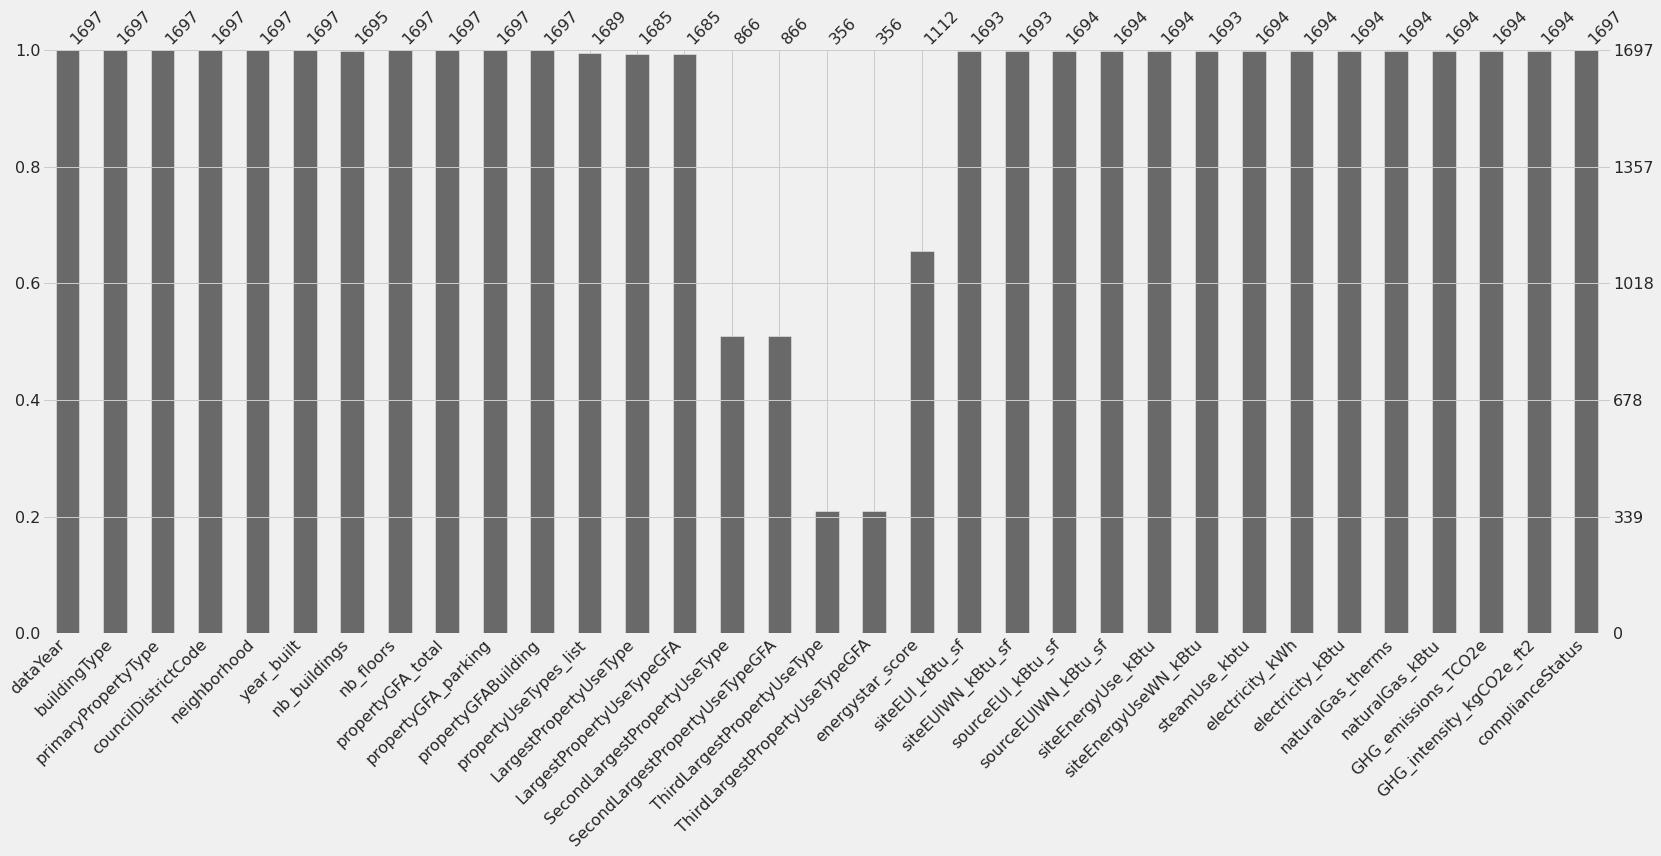

In [ ]:
msno.bar(data)

In [ ]:
data.isnull().sum().sort_values()

dataYear                              0
propertyGFABuilding                   0
propertyGFA_parking                   0
propertyGFA_total                     0
nb_floors                             0
complianceStatus                      0
neighborhood                          0
councilDistrictCode                   0
primaryPropertyType                   0
buildingType                          0
year_built                            0
nb_buildings                          2
siteEnergyUse_kBtu                    3
steamUse_kbtu                         3
GHG_intensity_kgCO2e_ft2              3
electricity_kBtu                      3
sourceEUI_kBtu_sf                     3
naturalGas_therms                     3
naturalGas_kBtu                       3
GHG_emissions_TCO2e                   3
electricity_kWh                       3
sourceEUIWN_kBtu_sf                   3
siteEnergyUseWN_kBtu                  4
siteEUI_kBtu_sf                       4
siteEUIWN_kBtu_sf                     4


In [ ]:
data[data[['LargestPropertyUseType']].isna().any(axis=1)]

,dataYear,buildingType,primaryPropertyType,councilDistrictCode,neighborhood,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,propertyUseTypes_list,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2,complianceStatus
1522,2015,nonresidential,worship facility,2,southeast,1927,1.000,2.000,22029,0,22029,None,NaN,nan,NaN,nan,NaN,nan,100.000,4.200,4.500,13.100,14.300,91996.000,100020.000,0.000,26963.000,92000.000,0.000,0.000,0.640,0.010,compliant
2262,2015,nonresidential,mixed use property,7,magnolia / queen anne,1928,1.000,2.000,23000,0,23000,None,NaN,nan,NaN,nan,NaN,nan,nan,25.900,28.100,56.900,59.100,595839.000,645694.000,0.000,95664.000,326420.000,2694.000,269432.000,16.590,0.660,compliant
2466,2015,nonresidential,retail store,2,downtown,1900,1.000,2.000,21600,0,21600,None,NaN,nan,NaN,nan,NaN,nan,nan,9.000,9.000,28.300,28.300,184077.000,184077.000,0.000,53950.000,184085.000,0.000,0.000,1.280,0.020,compliant
406,2015,nonresidential,non-refrigerated warehouse,7,lake union,1955,1.000,1.000,66968,0,66968,None,NaN,nan,NaN,nan,NaN,nan,1.000,23.500,23.500,73.800,73.800,1575581.000,1575581.000,0.000,461096.000,1573323.000,23.000,2323.000,11.090,0.060,compliant
204,2015,nonresidential,retail store,7,downtown,1989,1.000,4.000,111077,0,111077,None,NaN,nan,NaN,nan,NaN,nan,91.000,60.600,62.100,190.200,195.100,9898724.000,10155788.000,0.000,2901150.000,9899135.000,0.000,0.000,69.010,0.240,compliant
593,2015,nonresidential,other,2,greater duwamish,1969,1.000,1.000,54171,0,54171,None,NaN,nan,NaN,nan,NaN,nan,nan,21.000,27.200,35.600,41.700,1008645.000,1308787.000,0.000,92058.000,314113.000,6945.000,694545.000,39.080,0.700,compliant
5754,2016,nonresidential,small- and mid-sized office,4,lake union,2008,1.000,4.000,48350,0,48350,[office],NaN,nan,NaN,nan,NaN,nan,45.000,72.200,74.700,226.600,234.600,3168131.000,3280955.500,0.000,928526.000,3168131.000,0.000,0.000,22.090,0.460,compliant
6010,2016,nonresidential,mixed use property,4,northeast,1928,nan,2.000,20760,0,20760,None,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,non-compliant
5799,2016,nonresidential,restaurant,2,downtown,1913,1.000,3.000,28800,0,28800,[restaurant],NaN,nan,NaN,nan,NaN,nan,nan,31.200,32.500,62.000,62.800,899924.188,935833.188,0.000,118085.297,402907.000,4970.170,497017.000,29.210,1.010,compliant
3693,2016,nonresidential,self-storage facility,6,ballard,1946,2.000,2.000,111445,0,111445,"[fitness center/health club/gym, office, other - education, other - recreation, other - restaurant/bar, outpatient rehabilitation/physical therapy, personal services, restaurant, retail store, self-storage facility, vocat]",NaN,nan,NaN,nan,NaN,nan,nan,47.800,51.000,103.000,106.400,5697472.500,6076957.000,0.000,881452.000,3007514.000,26899.582,2689958.000,163.830,1.470,compliant


In [ ]:
# fill second and third property use type for buildingd which has only one type
for idx in [idx for idx, r in data.iterrows() if r.propertyUseTypes_list and len(r.propertyUseTypes_list)==1]:
    if data['LargestPropertyUseType'][idx] == np.nan:
        data.at[idx,'LargestPropertyUseType'] = data['LargestPropertyUseType'][idx]

    if type(data['SecondLargestPropertyUseType'][idx]) != str:
        data.at[idx,'SecondLargestPropertyUseType'] = 'No secondary use'
    if np.isnan(data['SecondLargestPropertyUseTypeGFA'][idx]):
        data.at[idx,'SecondLargestPropertyUseTypeGFA'] = 0.

    if type(data['ThirdLargestPropertyUseType'][idx]) != str:
        data.at[idx,'ThirdLargestPropertyUseType'] = 'No third use'
    if np.isnan(data['ThirdLargestPropertyUseTypeGFA'][idx]):
        data.at[idx,'ThirdLargestPropertyUseTypeGFA'] = 0.


# fill third property use type for buildingd which has only 2 types
for idx in [idx for idx, r in data.iterrows() if r.propertyUseTypes_list and len(r.propertyUseTypes_list)==2]:
    if type(data['ThirdLargestPropertyUseType'][idx]) != str:
        data.at[idx,'ThirdLargestPropertyUseType'] = 'No third use'
    if np.isnan(data['ThirdLargestPropertyUseTypeGFA'][idx]):
        data.at[idx,'ThirdLargestPropertyUseTypeGFA'] = 0.


# fill last missing PropertyUseTypes
data.LargestPropertyUseType.fillna("unknown", inplace=True)
data.SecondLargestPropertyUseType.fillna("unknown", inplace=True)
data.ThirdLargestPropertyUseType.fillna("unknown", inplace=True)
# the GFA columns will be imputed before making predictions

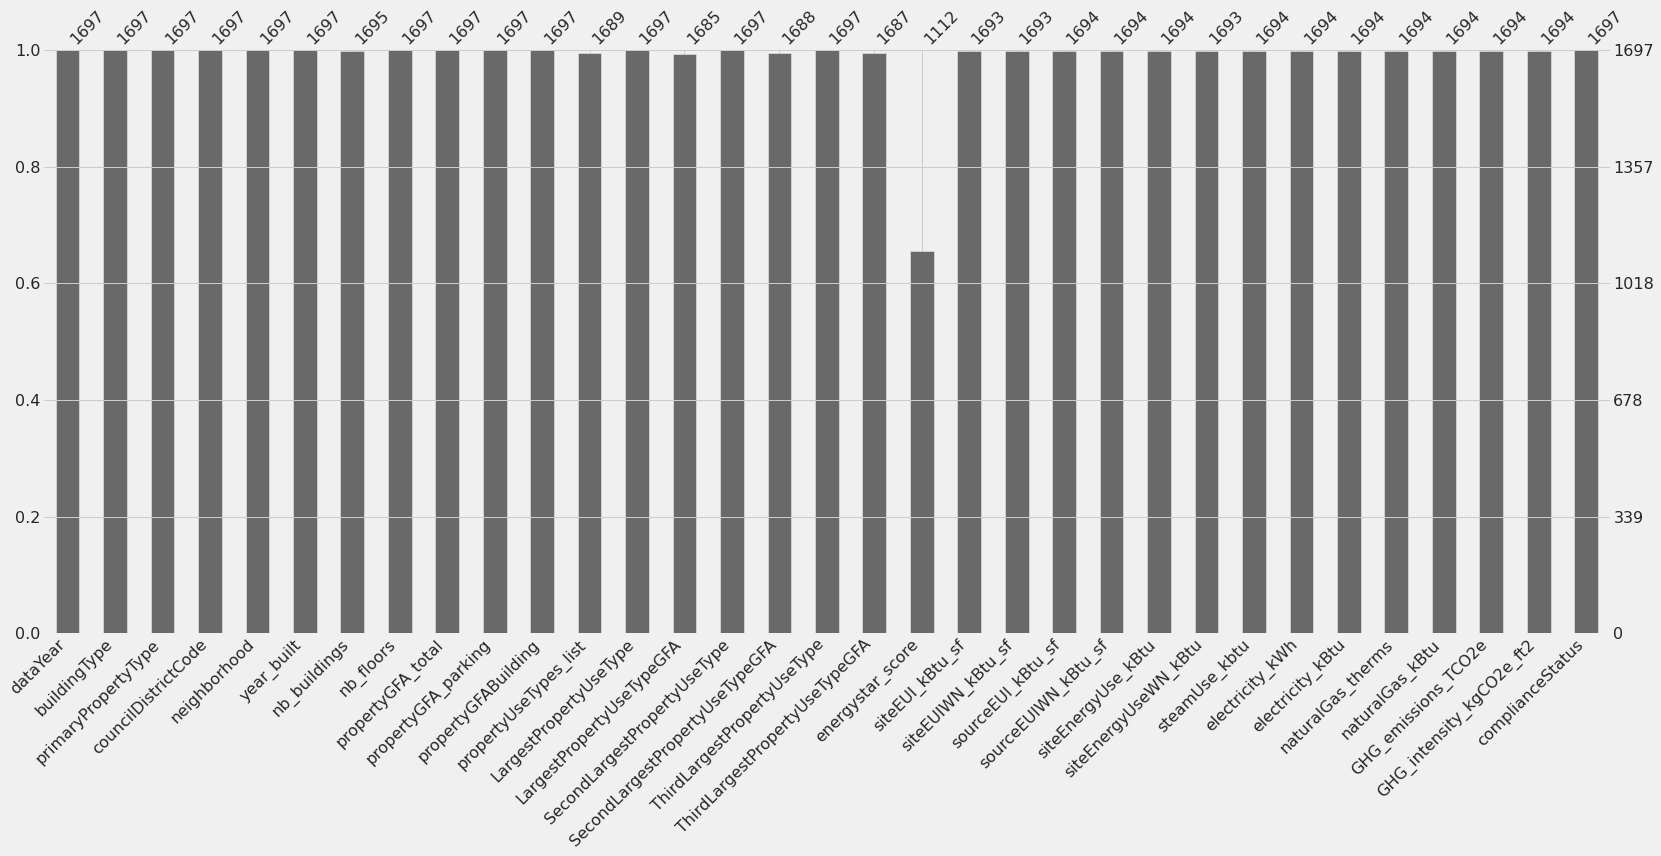

In [ ]:
msno.bar(data)

### Outliers

In [ ]:
data.describe()

,dataYear,councilDistrictCode,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2
count,1697.000,1697.000,1697.000,1695.000,1697.000,1697.000,1697.000,1697.000,1685.000,1688.000,1687.000,1112.000,1693.000,1693.000,1694.000,1694.000,1694.000,1693.000,1694.000,1694.000,1694.000,1694.000,1694.000,1694.000,1694.000
mean,2015.982,4.369,1961.705,1.169,4.104,118529.959,13138.325,105391.634,98841.280,18950.667,3131.099,65.544,72.298,74.744,175.856,178.148,8479475.177,8121699.754,518579.705,1715040.747,5851723.458,19999.884,1999988.331,187.042,1.608
std,0.132,2.192,32.860,2.910,6.518,295548.355,43246.463,282021.928,275575.861,53334.204,17874.177,28.433,74.861,75.979,186.265,186.354,30242445.994,22236434.884,5492548.056,6071583.684,20716251.242,94909.907,9490990.909,755.553,2.336
min,2015.000,1.000,1900.000,0.000,0.000,11285.000,0.000,3636.000,5656.000,0.000,0.000,1.000,0.000,0.000,0.000,-2.100,0.000,0.000,0.000,-33826.801,-115417.000,0.000,0.000,-0.800,-0.020
25%,2016.000,2.000,1930.000,1.000,1.000,29380.000,0.000,28309.000,25500.000,0.000,0.000,49.000,33.500,35.300,76.325,79.025,1219774.344,1291405.250,0.000,210983.797,719877.000,0.000,0.000,19.865,0.340
50%,2016.000,4.000,1965.000,1.000,2.000,49249.000,0.000,47237.000,43615.000,0.000,0.000,73.000,51.900,53.900,130.900,134.150,2549435.125,2682242.750,0.000,471861.594,1609991.500,4967.735,496773.500,49.565,0.880
75%,2016.000,7.000,1989.000,1.000,4.000,105100.000,0.000,94713.000,92006.000,12702.000,0.000,89.000,81.700,85.200,203.950,205.700,6872129.125,7109712.500,0.000,1413599.156,4823200.750,15227.152,1522715.250,142.257,1.890
max,2016.000,7.000,2015.000,111.000,99.000,9320156.000,512608.000,9320156.000,9320156.000,686750.000,459748.000,100.000,834.400,834.400,2620.000,2620.000,873923712.000,471613856.000,134943456.000,192577488.000,657074389.000,2979090.000,297909000.000,16870.980,34.090


In [ ]:
# drop outliers for the features to predict with z-score 
data = data[np.abs(data['GHG_emissions_TCO2e']-data['GHG_emissions_TCO2e'].mean())<=(3*data['GHG_emissions_TCO2e'].std())]
data = data[np.abs(data['siteEnergyUse_kBtu']-data['siteEnergyUse_kBtu'].mean())<=(3*data['siteEnergyUse_kBtu'].std())]
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1642 rows / 33 columns


## EDA

In [ ]:
data.describe()

,dataYear,councilDistrictCode,year_built,nb_buildings,nb_floors,propertyGFA_total,propertyGFA_parking,propertyGFABuilding,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,energystar_score,siteEUI_kBtu_sf,siteEUIWN_kBtu_sf,sourceEUI_kBtu_sf,sourceEUIWN_kBtu_sf,siteEnergyUse_kBtu,siteEnergyUseWN_kBtu,steamUse_kbtu,electricity_kWh,electricity_kBtu,naturalGas_therms,naturalGas_kBtu,GHG_emissions_TCO2e,GHG_intensity_kgCO2e_ft2
count,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1632.000,1635.000,1634.000,1082.000,1641.000,1641.000,1642.000,1642.000,1642.000,1641.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000,1642.000
mean,2015.984,4.347,1961.243,1.068,3.689,92769.501,10898.521,81870.980,75605.534,14802.262,2028.968,65.520,69.085,71.783,167.573,170.515,5315566.126,5458153.148,194454.160,1111662.030,3792992.628,13095.251,1309524.970,111.001,1.522
std,0.127,2.193,32.880,1.016,5.132,127530.205,34858.432,110050.826,97690.175,40267.933,8963.540,28.441,69.654,71.059,167.870,168.493,7212327.664,7325196.750,1202323.246,1677233.513,5722722.079,24089.644,2408964.392,174.395,2.095
min,2015.000,1.000,1900.000,0.000,0.000,11285.000,0.000,3636.000,5656.000,0.000,0.000,1.000,0.000,0.000,0.000,-2.100,0.000,0.000,0.000,-33826.801,-115417.000,0.000,0.000,-0.800,-0.020
25%,2016.000,2.000,1929.000,1.000,1.000,28825.250,0.000,27914.250,25000.000,0.000,0.000,49.000,32.700,34.600,74.425,77.550,1184862.875,1265151.625,0.000,205367.801,700715.250,0.000,0.000,19.175,0.340
50%,2016.000,4.000,1965.000,1.000,2.000,47484.500,0.000,45558.000,41813.500,0.000,0.000,73.000,51.000,53.500,127.350,131.050,2440852.375,2579774.500,0.000,450586.156,1537400.000,4835.180,483518.000,47.320,0.850
75%,2016.000,7.000,1989.000,1.000,4.000,97948.000,0.000,88425.500,83628.750,11538.500,0.000,89.000,79.500,83.200,197.775,200.425,6296938.375,6528948.000,0.000,1262424.625,4307392.500,14053.410,1405341.000,127.020,1.820
max,2016.000,7.000,2015.000,27.000,99.000,1400000.000,407795.000,1400000.000,1072000.000,686750.000,177210.000,100.000,834.400,834.400,2620.000,2620.000,42792072.000,45547252.000,18547858.000,12215895.000,41680634.000,309673.000,30967300.000,1727.110,25.710


The features I'll try to predict are the total amount of CO2 emission (GHG_emissions_TCO2e) and energy consumption (siteEnergyUse_kBtu)  
I also have to find if energystar_score if useful for the prediction because it's difficult to calculate this value

In [ ]:
# chart
fig = make_subplots(rows=1, cols=3,
                    horizontal_spacing=0.1,
                    specs=[[{"type": "box"}, {"type": "box"}, {"type": "box"}]],
                    subplot_titles=("CO2 Emissions", "Energy Consumption", 'Energy Star Score'))

fig.add_trace(go.Box(y=data.GHG_emissions_TCO2e, boxmean=True, marker_color='#65cbe9', name='CO2 Emissions'), row=1, col=1)
fig.add_trace(go.Box(y=data.siteEnergyUse_kBtu, boxmean=True, marker_color='#f6ac69', name='Energy Consumption'), row=1, col=2)
fig.add_trace(go.Box(y=data.energystar_score, boxmean=True, marker_color='#84dcc6', name='Energy Star Score'), row=1, col=3)

# styling
fig.for_each_annotation(lambda a: a.update(text=f'<b>{a.text}</b>'))
fig.update_layout(width=1000, height=500, showlegend=False, **plotly_base_params)
fig.update_xaxes(visible=False)
fig.show()

In [ ]:
# look for pertinent categorical features to compare
data.select_dtypes(include=object).columns

Index(['buildingType', 'primaryPropertyType', 'neighborhood',
       'propertyUseTypes_list', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'complianceStatus'],
      dtype='object')

### CO2 Emissions

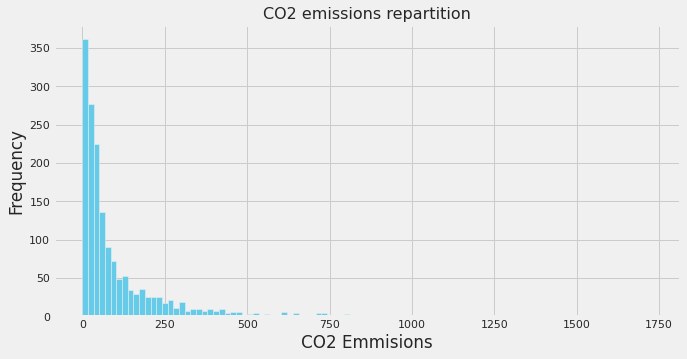

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(data.GHG_emissions_TCO2e, bins=100, range=None, histtype='bar', color='#65cbe9')
plt.xlabel('CO2 Emmisions')
plt.ylabel('Frequency')
plt.title('CO2 emissions repartition', fontsize=16)
plt.show()

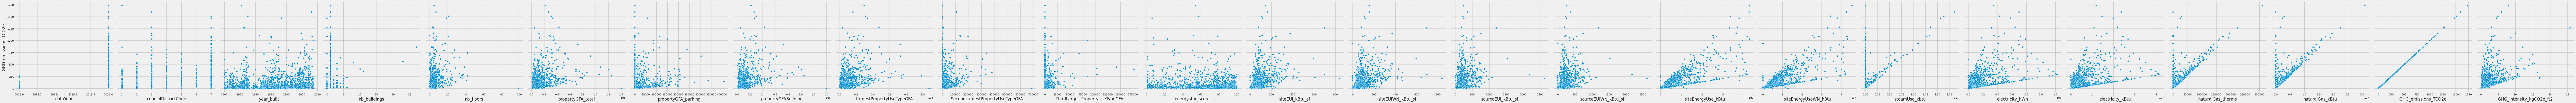

In [ ]:
sns.pairplot(data, height=6,
             diag_kind=None,
             y_vars=['GHG_emissions_TCO2e'])
# double clic on plots to see their real size

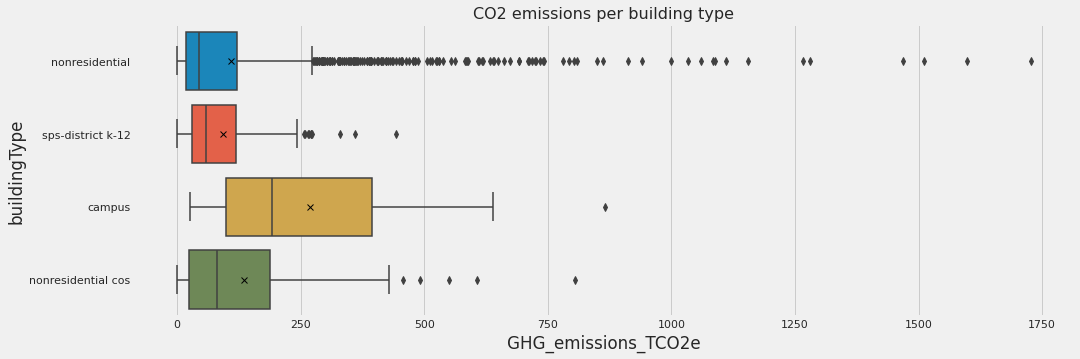

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('CO2 emissions per building type', fontsize=16)
sns.boxplot(y="buildingType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

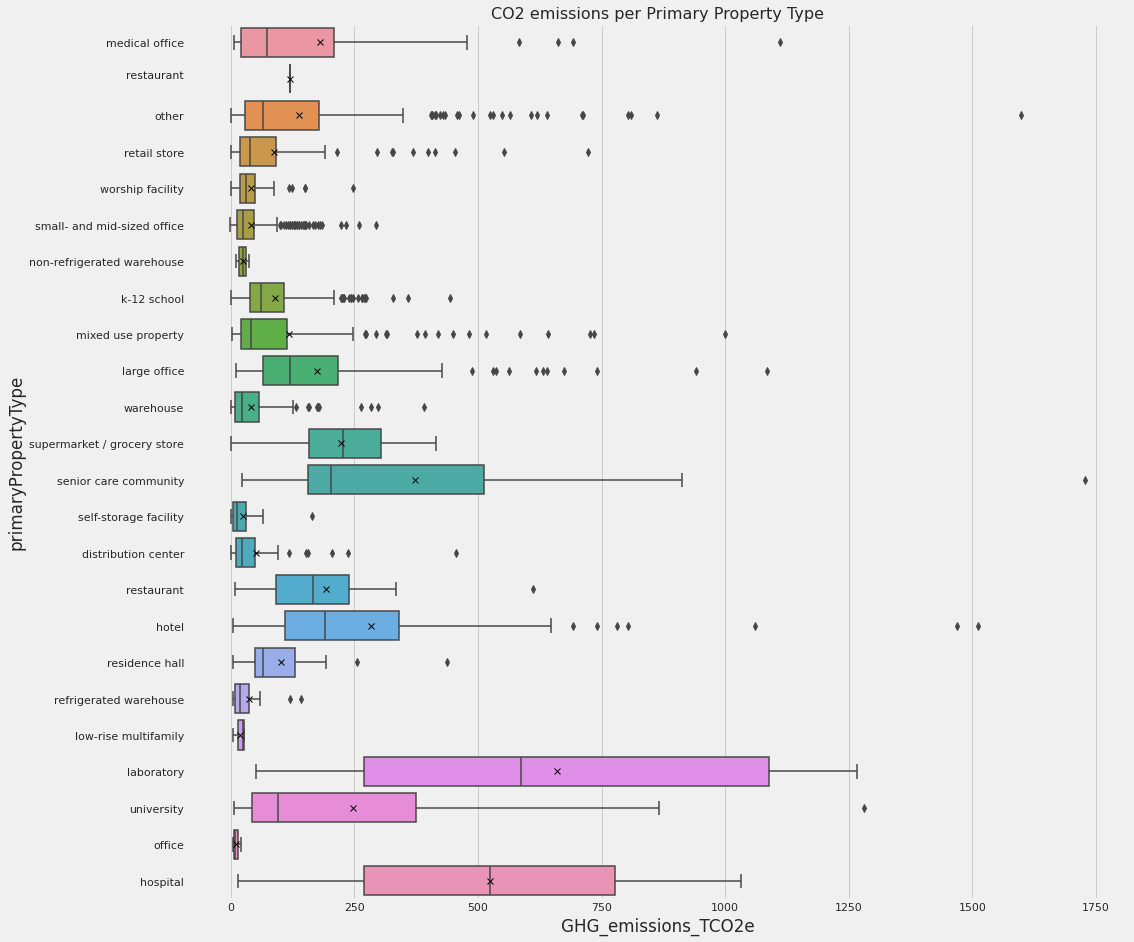

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('CO2 emissions per Primary Property Type', fontsize=16)
sns.boxplot(y="primaryPropertyType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

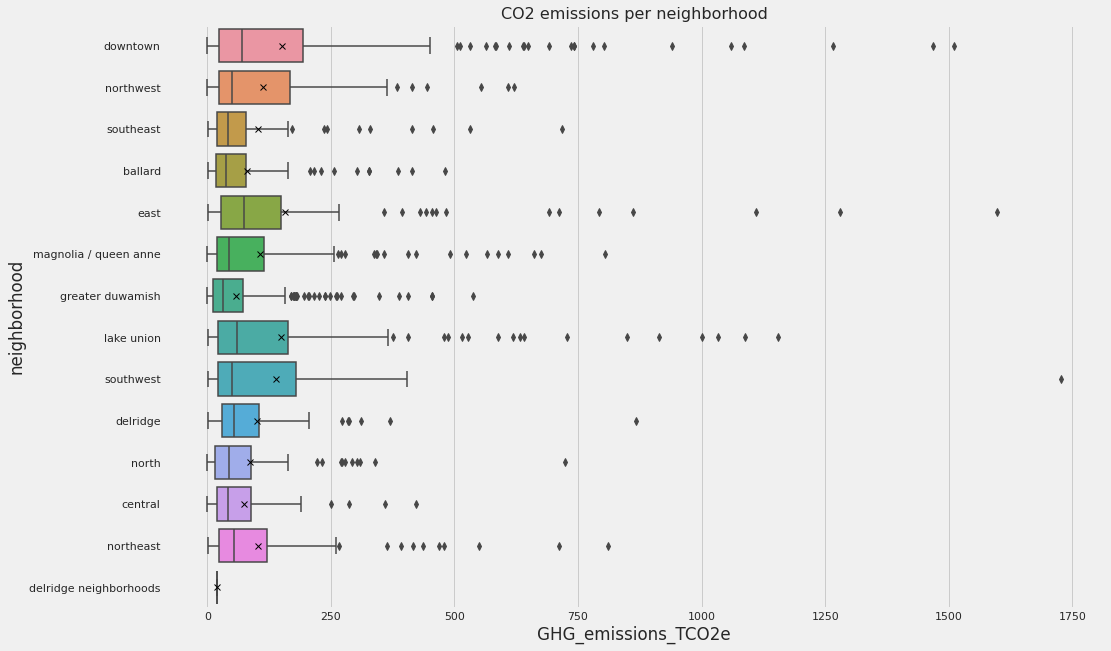

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('CO2 emissions per neighborhood', fontsize=16)
sns.boxplot(y="neighborhood", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Energy consumption

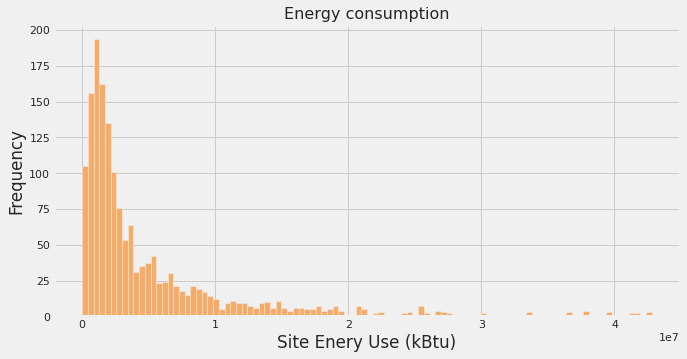

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(data.siteEnergyUse_kBtu, bins=100, range=None, histtype='bar', color='#f6ac69')
plt.xlabel('Site Enery Use (kBtu)')
plt.ylabel('Frequency')
plt.title('Energy consumption', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

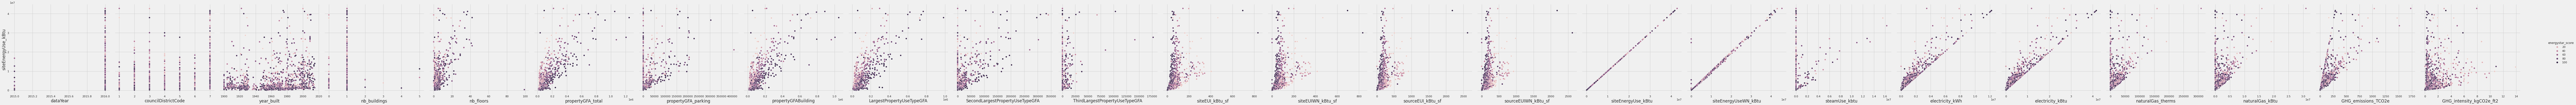

In [ ]:
plt.figure()
sns.pairplot(data, height=6,
             hue='energystar_score',
             diag_kind=None,
             y_vars='siteEnergyUse_kBtu')
plt.show()

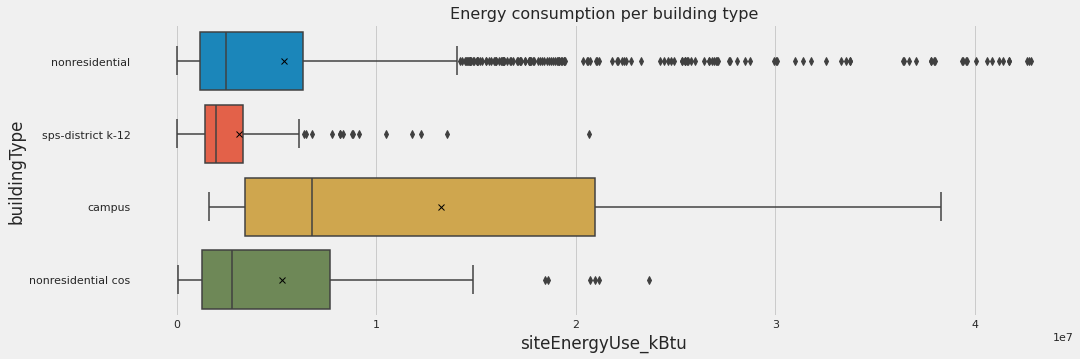

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Energy consumption per building type', fontsize=16)
sns.boxplot(y="buildingType", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

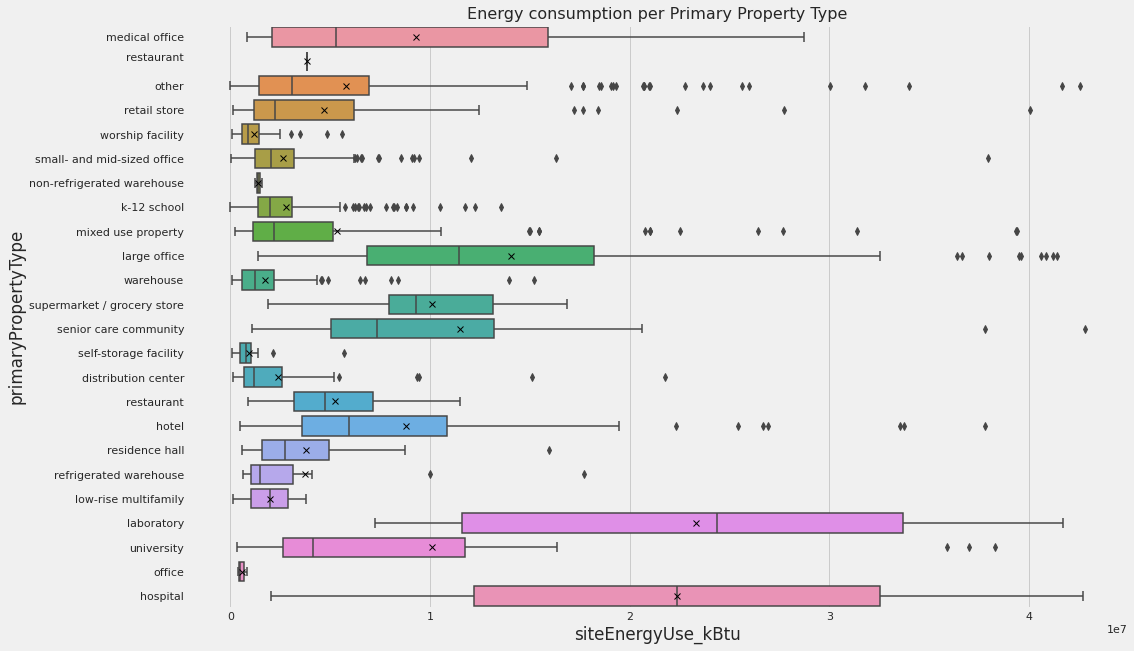

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Energy consumption per Primary Property Type', fontsize=16)
sns.boxplot(y="primaryPropertyType", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

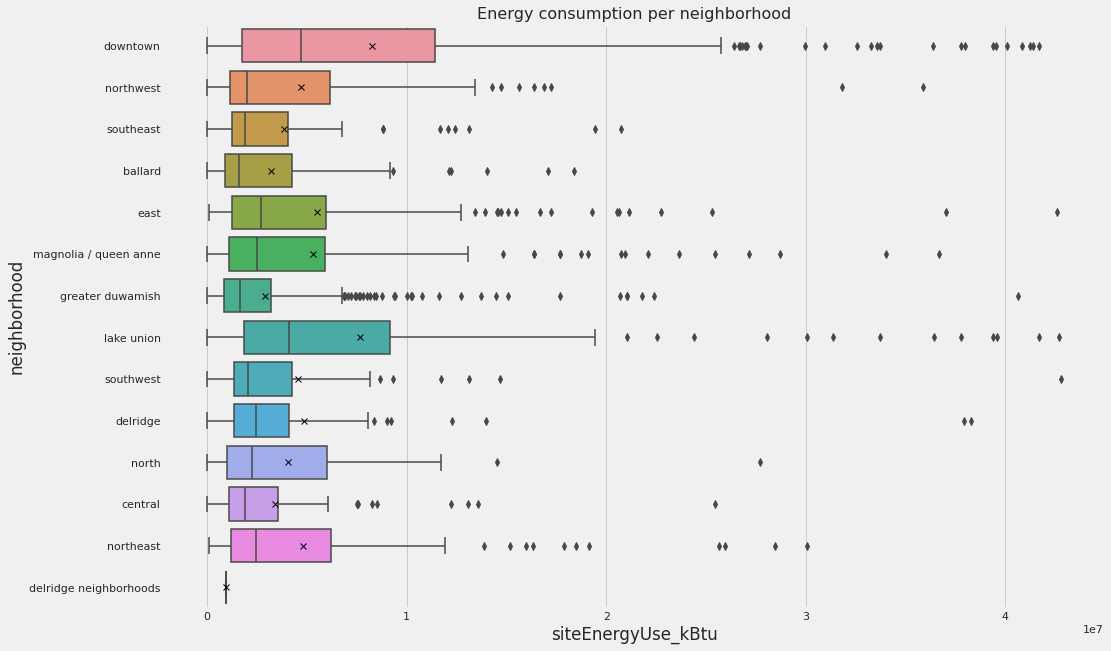

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Energy consumption per neighborhood', fontsize=16)
sns.boxplot(y="neighborhood", x="siteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Correlation matrix

In [ ]:
corr = data.corr(method="pearson")

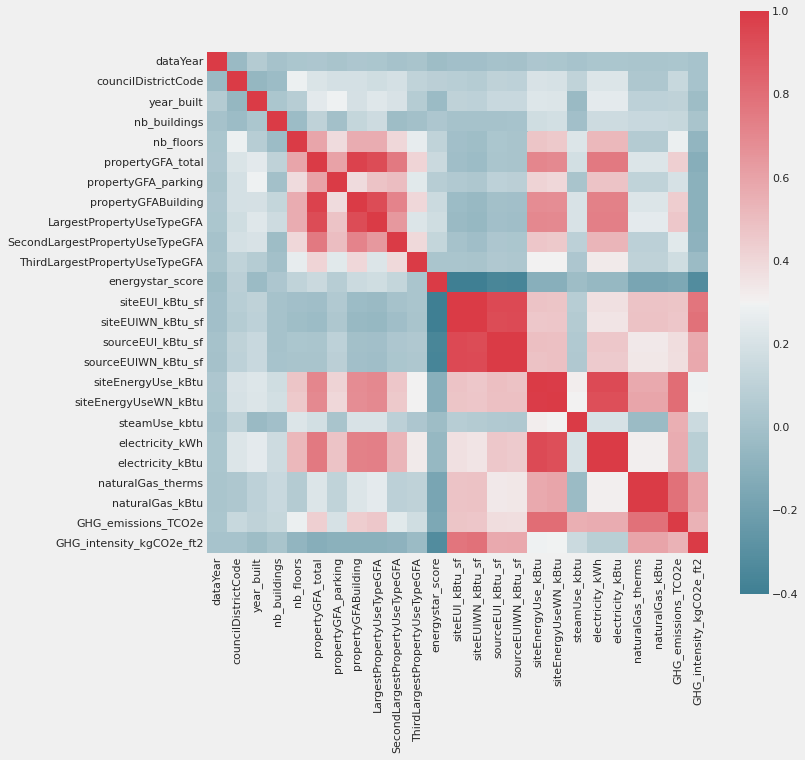

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Feature engineering

In [ ]:
# Number of propertyUseTypes
data['n_propertyUseTypes'] = [len(x) if x else 0 for x in data.propertyUseTypes_list]
data.drop(columns=['propertyUseTypes_list'], inplace=True)

In [ ]:
# Building Age
data['buildingAge'] = data['dataYear'] - data['year_built']
data.drop(columns=['dataYear', 'year_built'], inplace=True)

In [ ]:
# boolean columns to know if the building use electricity and/or gas  
data['consumeElectricity'] = (data['electricity_kWh']!=0) | (data['electricity_kBtu']!=0)
data['consumeGas'] = (data['naturalGas_kBtu']!=0) | (data['naturalGas_therms']!=0)
data['consumeSteam'] = (data['steamUse_kbtu']!=0) | (data['steamUse_kbtu']!=0)

In [ ]:
val_cnt = pd.DataFrame([data['consumeElectricity'].value_counts(), data['consumeGas'].value_counts(), data['consumeSteam'].value_counts()])

fig = make_subplots(rows=2, cols=2,
                    horizontal_spacing=0.1, vertical_spacing=0.15,
                    specs=[[{"type": "box"}, {"type": "bar"}],
                           [{"type": "histogram", "colspan": 2}, None]],
                    subplot_titles=("ProPerty Use Types", "Used Energy", 'Building Age'))

fig.add_trace(go.Box(y=data['n_propertyUseTypes'], name='Property Use Types', boxmean=True, marker_color='blue'), row=1, col=1)

fig.add_trace(go.Bar(x=val_cnt.index, y=val_cnt[True], marker_color='#2ad457', name="Used"), row=1, col=2)
fig.add_trace(go.Bar(x=val_cnt.index, y=val_cnt[False], marker_color='#fa5c4b', name='Not used'), row=1, col=2)

fig.add_trace(go.Histogram(x=data.buildingAge, name='Building Age', marker_color='#a791db'), row=2, col=1)

fig.update_layout(width=1000, height=700, barmode='stack',
                  bargap=0.1, showlegend=False,
                  title="Feature Engineering", **plotly_base_params)
fig.show()

Almost all buildings consume electricity. So the consumeElec column contains very few false values. It is therefore not relevant to keep this column

In [ ]:
data.drop(columns='consumeElectricity', inplace=True)

## Data Leakage

**Target leakage**  
It can be considered that all the values calculated from the features to predict will not be available for predictions on new data and are therefore a source of leakage. As well as consumption values of the different energy sources for each building. 

In [ ]:
# according to the column description in the metadata
leaky_predictors=['siteEUI_kBtu_sf', 
                  'siteEUIWN_kBtu_sf', 
                  'sourceEUI_kBtu_sf', 
                  'sourceEUIWN_kBtu_sf', 
                  'siteEnergyUseWN_kBtu', 
                  'electricity_kWh', 
                  'electricity_kBtu', 
                  'naturalGas_therms', 
                  'naturalGas_kBtu', 
                  'GHG_intensity_kgCO2e_ft2',
                  'steamUse_kbtu']

In [ ]:
data.drop(columns=leaky_predictors, inplace=True)

## Save cleaned CSV

In [ ]:
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1642 rows / 23 columns


In [ ]:
data.to_csv('Pelec_04_data/cleaned_data.csv', sep=',', index=False)